## Reading Data from the Web

Often data that we are interested in accessing is not on our local computer, but is provided somewhere by a web server.  All of the data input and output (I/O) that we have considered so far assumes that the data resides locally on our machine.  Of course we can usually download a file on the web and then read in the local copy we have saved, but in some cases we might not want to do that.  For example, imagine we want to track data from a website that keeps changing over time, and we'd like to be able to re-run our data analyses each time with the most up-to-date data, without having to keep downloading the same files over and over.

Fortunately, some of the same tools and functions that we've been using to read data from local files on our computer can also be used to read files directly from a remote file on a web site.  In addition, other libraries are available to enable us to access data in other formats that are served up on websites.  We'll have a look below at how that works.  


### Step 1.

Execute the next two code cells below, first to do some imports, and then to examine the documentation for the pandas ```read_csv``` function that we have used previously.  In particular, scroll down for information about the first argument that is passed to the function: ```filepath_or_buffer```.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.read_csv?

The documentation on the ```read_csv``` function states:

<pre>
filepath_or_buffer : str, path object or file-like object
    Any valid string path is acceptable. The string could be a URL. Valid
    URL schemes include http, ftp, s3, and file. For file URLs, a host is
    expected. A local file could be: file://localhost/path/to/table.csv.
</pre>            
            
Up until now, we have passed strings containing the names of local files.  But the documentation states that the string could be a URL.  URL stands for "Uniform Resource Locator", and as the name implies, provides a uniform framework for locating resources on computers.  We tend to think of a URL as indicating a web address, prefixed with a protocol (or scheme) such as "http" or "https", but there are a number of different possible schemes that ```read_csv``` can read from.

### Step 2.

One type of dataset that gets continually updated, and from which we might want to run repeated analyses over time, involves political polling data.  New polls are added over time, and one is often interested in computing running averages, detecting trends over time, etc.  While we won't do much poll analysis here, we can at least download some data, although you are of course free to explore such data in more detail if you are interested.

The website "fivethirtyeight.com" serves a variety of different political polling datasets.  One of these, containing data about US presidential polls, is located at the URL [https://projects.fivethirtyeight.com/polls-page/president_primary_polls.csv](https://projects.fivethirtyeight.com/polls-page/president_primary_polls.csv) .  This is just a regular csv file, stored at that URL.

In the code cell below, write and evaluate an expression that uses ```pd.read_csv``` that reads the latest polling data, and stores the result in the variable ```poll_data```.  Examine the contents of the dataframe.

<b>Note: When reading csv files using ```pd.read_csv``` , you might occasionally see some warning messages, even if the dataframe is created correctly. These warning messages will be similar to the following: <img src="csverror.png" width=650 height=650>There are ways to suppress different types of warning messages if you want to.</b> 

## Graded Cell

This cell is worth 30% of the grade for this assignment.

In [4]:
poll_data = pd.read_csv("https://projects.fivethirtyeight.com/polls-page/president_primary_polls.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [5]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testPollData

try:
    print(testPollData(poll_data))    
except Exception as e:
    print("Error!\n" + str(e))

Correct!


Now that we have read all the data into a dataframe, we can carry out the usual sorts of analyses we do.  For example, one column in this dataframe is ```candidate_name```.  We might be interested in getting a list of all the candidates who are included in these polls.  Execute the code cell below, which uses the <code>unique</code> method on a Series, to see the names of everyone included.

In [6]:
poll_data['candidate_name'].unique()

array(['Joseph R. Biden Jr.', 'Bernard Sanders', 'Tulsi Gabbard',
       'Elizabeth Warren', 'Michael Bloomberg', 'Pete Buttigieg',
       'Amy Klobuchar', 'Donald Trump', 'William F. Weld', 'Tom Steyer',
       'Andrew Yang', 'Roque De La Fuente', 'Michael F. Bennet',
       'Cory A. Booker', 'Julián Castro', 'John K. Delaney', 'Joe Sestak',
       'Marianne Williamson', 'Joe Walsh', 'Deval Patrick', 'Mosie Boyd',
       'Michael Ellinger', 'Mark Stewart Greenstein', 'Mike Pence',
       'Kamala D. Harris', 'Robert Wells', 'Nathan Bloxham',
       "Beto O'Rourke", 'Steve Bullock', 'Wayne Messam',
       'Kirsten E. Gillibrand', 'Mike Gravel', 'Eric Swalwell',
       'Tim Ryan', 'Hillary Rodham Clinton', 'Bill de Blasio',
       'Jay Robert Inslee', 'John Kerry', 'Mark Sanford',
       'John Hickenlooper', 'Mitt Romney', 'John Richard Kasich',
       'Michelle Obama', 'Seth Moulton', 'Terry R. McAuliffe',
       'Nimrata R. Haley', 'Stacey Yvonne Abrams', 'Bob Corker',
       'Marco Ru

### Step 3.

In some cases, data might be accessible not from a static file on a remote website, but through an API, or Application Programming Interface.  An API defines how we can access that remote data through a function call, so that we can access it from within our programs.  For example, if you are interested in analyzing Twitter data, you can set up an account through Twitter and search for particular tweets of interest through the [Twitter search API](https://developer.twitter.com/en/docs/tweets/search/overview).  A detailed discussion of data APIs is beyond the scope of this course, but we'll consider a simpler example here, which is able to access data on a website by making HTTP requests.

There is a bike-sharing system in New York City called "Citi Bike".  Bikes are picked up and deposited at fixed locations around the greater NYC metropolitan area.  The information on where those bike stations are is accessible from the Citi Bike website, which we can access using the Python ```requests``` library.  The information on bike stations is part of a larger data standardization format used by many bikeshare organizations around the world, known as the General Bikeshare Feed Specification (GBFS).

The station data contain many fields, such as street location, latitude/longitude location, number of available bike docks, etc.  They are served up in a format known as JSON, which stands for JavaScript Object Notation, which is standard, widely used, human-readable format for storing and communicating data across different programs and platforms.  At its core, JSON stores key-value pairs, making them very similar to Python dictionaries.  The requests module provides a method to convert the data stored in JSON responses into Python dictionaries.

If you're interested in learning more, the requests package is described [here](https://requests.readthedocs.io/en/master/).  JSON is introduced generally [here](https://www.json.org/json-en.html),  with a separate Python JSON library described [here](https://docs.python.org/3/library/json.html). If you're interested in working with the bikeshare data more fully beyond this exercise, you can learn more about it <a href="https://www.citibikenyc.com/system-data">here</a>, but if you do, make sure that you comply with the terms of the <a href="https://www.citibikenyc.com/data-sharing-policy">Data License Agreement</a>.

Execute the code cell below, which uses the Python requests library to get information about the Citi Bike stations, which are stored in a <code>Response</code> object.  Since the data access might not always succeed (for example, maybe the website is down), it can be useful to check the status code from the request.  In this case, status_code = 200 indicates the download was successful, but if you are having problems accessing the data, please contact your Facilitator.

In [7]:
import requests
response = requests.get("https://gbfs.citibikenyc.com/gbfs/en/station_information.json")

if response.status_code != 200:
        print("Error with website. If problem persists, contact your Facilitator!")
else:
    print("Data download successful")

Data download successful


Now execute the code cell below.  This calls the <code>json</code> method on the response object, which converts the JSON data downloaded from the website to a Python dictionary, which we have named ```datadict```.  The keys of the dictionary are then printed &mdash; the data of interest to us are associated with the key ```'data'```, which itself is associated with another dictionary with key ```'stations'```, which stores the actual station data.

In [8]:
datadict = response.json()
print(datadict.keys())
print(datadict['data'].keys())

dict_keys(['data', 'last_updated', 'ttl', 'version'])
dict_keys(['stations'])


The JSON data also contains information about when it was last updated.  This is stored as an integer representing the number of seconds since the start of the <i>epoch</i>, conventionally chosen to be January 1, 1970 on Unix-based systems.  Fortunately, the <a href="https://docs.python.org/3/library/time.html">time module that is part of the Python Standard Library</a> provides a useful way to convert that large number of seconds to a more readable date-time string.  Execute the code cell below to see when the station json file was last updated.

If you reload the json data repeatedly using the call to <code>requests.get</code> above, you might see that the json data file appears to be updated every five seconds.

In [9]:
print(datadict['last_updated'])
import time
print(time.ctime(datadict['last_updated']))

1721173758
Tue Jul 16 23:49:18 2024


In the code cell below, enter and evaluate ```datadict['data']['stations']``` to view the list of all bike stations.  Each station is itself stored in a dictionary, with keys such as ```'station_id'```, ```name```, ```'capacity'```, etc.  There is also information about the location of each station associated with the keys ```'lat'``` and ```'lon'```, short for 'latitude' and 'longitude', respectively.

In [10]:
datadict['data']['stations']

[{'capacity': 51,
  'eightd_has_key_dispenser': False,
  'eightd_station_services': [],
  'electric_bike_surcharge_waiver': False,
  'external_id': '7d5fa1f0-4069-4d5d-b735-5d500597394a',
  'has_kiosk': True,
  'lat': 40.72323,
  'lon': -74.00314,
  'name': 'W Broadway & Watts St',
  'region_id': '71',
  'rental_methods': ['KEY', 'CREDITCARD'],
  'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan',
   'ios': 'https://bkn.lft.to/lastmile_qr_scan'},
  'short_name': '5569.07',
  'station_id': '7d5fa1f0-4069-4d5d-b735-5d500597394a',
  'station_type': 'classic'},
 {'capacity': 65,
  'eightd_has_key_dispenser': False,
  'eightd_station_services': [],
  'electric_bike_surcharge_waiver': False,
  'external_id': '40043e8a-6ef6-428d-b585-a7c23cdb06d4',
  'has_kiosk': True,
  'lat': 40.73866091428551,
  'lon': -73.98987293243407,
  'name': 'Broadway & E 19 St',
  'region_id': '71',
  'rental_methods': ['KEY', 'CREDITCARD'],
  'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr

### Step 4.

In the code cell below, write and evaluate code to extract the latitude and longitude of every bike station, and store the result in a variable named ```coordinates```.  Store the data in a numpy array of shape (N,2), where N is the total number of stations, and 2 reflects the number of columns &mdash; store all the longitudes in the first column and all the latitudes in the second column.

Carry out this data extraction however you see fit.  The basic steps you will need to carry out are:

* import the numpy module
* loop over all the station entries in the list of dictionaries returned by ```datadict['data']['stations']```
* extract the 'lon' and 'lat' entries associated with each station
* build up a list of (lon, lat) pairs, one for each station
* convert the list of (lon, lat) pairs to a numpy array with two columns.

After importing numpy, the remaining set of steps above can be done in one line, using a list comprehension to extract the desired pair of fields from each station entry and then converting the list to a numpy array using the ```np.array``` function.  But if you'd rather break out each step separately within a ```for``` loop, that would work too.  When you are finished, you should have a numpy array with shape approximately equal to (1000, 2), since there should be approximately 1000 stations in the full array of coordinates (although that number can change over time as new stations are added or removed).  Print the shape of the array to determine how many stations are included in the dataset that you downloaded.



## Graded Cell

This cell is worth 35% of the grade for this assignment.

In [19]:
import numpy as np
stations = datadict['data']['stations']

coordinates = [(station['lon'], station['lat']) for station in stations]
coordinates = np.array(coordinates)
print(coordinates.shape)


(2215, 2)


## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [20]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testCoords

try:
    print(testCoords(coordinates))    
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


### Step 5.

Once you have extracted the coordinates, make a scatter plot of each location using ```plt.scatter``` (longitude on the x-axis, latitude on the y-axis) to get an approximate map of where all the stations are.  (Hint: you might want to make the dots smaller than the default size, by passing in an option such as ```s=3``` to reduce the marker size s, and you might want to first create an empty figure object with a square aspect ratio, e.g., ```plt.figure(figsize=(6,6)```.)  Consult a map of New York City alongside your plot: you should be able to make out the contours of the different boroughs that make up the city, the rivers that cut through and around it, Central Park that lies in the middle of upper Manhattan, and a smattering of bike stations in New Jersey that are part of the greater 
metropolitan area.

## Graded Cell

This cell is worth 35% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this: <br><img src="readURLScatterPlot.png" width=400 height=500  align="left"/>

<Figure size 432x432 with 0 Axes>

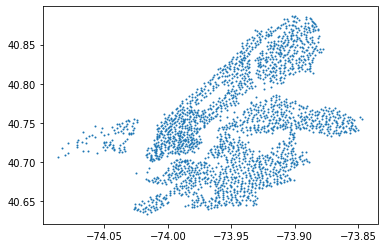

<Figure size 432x432 with 0 Axes>

In [31]:
plt.scatter(coordinates[:,0],coordinates[:,1], s= 1)
plt.figure(figsize=(6,6))

Note: even though we plotted longitude and latitude on a flat 2D (x-y) plane, they are in fact coordinates that describe a location on a sphere, that is, the surface of the Earth.  For a relatively small geographic area such as that containing New York City, it is reasonable not to worry about the distortion introduced by this approximation.  In other words, on the scale of NYC, the Earth is mostly flat, but if you were to plot longitude and latitude on a 2D plane over much larger distances, there would be significant distortions.  Mapmakers have developed many different projections, i.e., ways of displaying the 3D surface of the Earth on a 2D map, with each one introducing its own characteristic distortions.  No one projection is perfect, but different projections try to minimize different types of distortions that are introduced.